In [391]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [392]:
goog_df = pd.read_csv(Path("/Users/Hockenbery/fintech/Python_Project/Project-2/GOOG.csv"),
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

In [393]:
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-16,849.030029,850.849976,846.130005,848.780029,848.780029,977600
2017-03-17,851.609985,853.400024,847.109985,852.119995,852.119995,1712300
2017-03-20,850.010010,850.219971,845.150024,848.400024,848.400024,1231500
2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500
2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500


<AxesSubplot:xlabel='Date'>

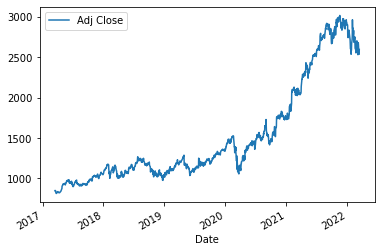

In [394]:
goog_df.plot(y='Adj Close')

In [395]:
exp1 = goog_df.Close.ewm(span=12, adjust=False).mean()
exp2 = goog_df.Close.ewm(span=26, adjust=False).mean()

In [396]:
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
goog_df['macd'] = macd
goog_df['exp3'] = exp3
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume,macd,exp3
Date,,,,,,,,
2017-03-16,849.030029,850.849976,846.130005,848.780029,848.780029,977600,0.000000,0.000000
2017-03-17,851.609985,853.400024,847.109985,852.119995,852.119995,1712300,0.266436,0.053287
2017-03-20,850.010010,850.219971,845.150024,848.400024,848.400024,1231500,0.175396,0.077709
2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500,-1.329042,-0.203641
2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500,-2.561988,-0.675310


In [397]:
goog_df.hvplot.line(y=['macd', 'exp3'])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [398]:
goog_df["Actual Returns"] = goog_df["Close"].pct_change()

In [399]:
goog_df['Signal'] = 0.0
goog_df.loc[(goog_df['Actual Returns'] >= 0), 'Signal'] = 1
goog_df.loc[(goog_df['Actual Returns'] < 0), 'Signal'] = -1
goog_df = goog_df.dropna()
display(goog_df.head())
display(goog_df.tail())

,Open,High,Low,Close,Adj Close,Volume,macd,exp3,Actual Returns,Signal
Date,,,,,,,,,,
2017-03-17,851.609985,853.400024,847.109985,852.119995,852.119995,1712300,0.266436,0.053287,0.003935,1.0
2017-03-20,850.010010,850.219971,845.150024,848.400024,848.400024,1231500,0.175396,0.077709,-0.004366,-1.0
2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500,-1.329042,-0.203641,-0.021146,-1.0
2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500,-2.561988,-0.675310,-0.001048,-1.0
2017-03-23,821.000000,822.570007,812.257019,817.580017,817.580017,3487100,-4.456838,-1.431616,-0.014477,-1.0


,Open,High,Low,Close,Adj Close,Volume,macd,exp3,Actual Returns,Signal
Date,,,,,,,,,,
2022-03-10,2629.250000,2670.770020,2628.020020,2653.639893,2653.639893,1213300,-31.123714,-31.849788,-0.008845,-1.0
2022-03-11,2679.989990,2684.000000,2605.929932,2609.510010,2609.510010,1328500,-31.604403,-31.800711,-0.016630,-1.0
2022-03-14,2611.459961,2620.520020,2528.260010,2534.820068,2534.820068,1512700,-37.579019,-32.956373,-0.028622,-1.0
2022-03-15,2554.830078,2610.344971,2531.360107,2593.209961,2593.209961,1513700,-37.173852,-33.799869,0.023035,1.0
2022-03-15,2554.830078,2610.344971,2531.360107,2593.209961,2593.209961,1514630,-36.432780,-34.326451,0.000000,1.0


In [400]:
X = goog_df[['macd', 'exp3']].shift().dropna()
X.head()

,macd,exp3
Date,,
2017-03-20,0.266436,0.053287
2017-03-21,0.175396,0.077709
2017-03-22,-1.329042,-0.203641
2017-03-23,-2.561988,-0.675310
2017-03-24,-4.456838,-1.431616


In [401]:
y = goog_df['Signal']
y.value_counts()

 1.0    693
-1.0    566
Name: Signal, dtype: int64

In [402]:
training_begin = X.index.min()
print(training_begin)

2017-03-20 00:00:00


In [403]:
training_end = X.index.min() + DateOffset(months=3)
print(training_end)

2017-06-20 00:00:00


In [404]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_train.head()

,macd,exp3
Date,,
2017-03-20,0.266436,0.053287
2017-03-21,0.175396,0.077709
2017-03-22,-1.329042,-0.203641
2017-03-23,-2.561988,-0.675310
2017-03-24,-4.456838,-1.431616


In [405]:
X_test = X.loc[training_end + DateOffset(hours=1):]
y_test = y.loc[training_end + DateOffset(hours=1):]
X_test.head()

,macd,exp3
Date,,
2017-06-21,6.363105,11.642294
2017-06-22,6.316986,10.577233
2017-06-23,6.020603,9.665907
2017-06-26,6.397846,9.012294
2017-06-27,5.557932,8.321422


In [406]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [407]:
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)
svm_pred_training = svm_model.predict(X_train_scaled)
svm_pred_training

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [408]:
svm_training_report = classification_report(y_train, svm_pred_training)
print(svm_training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        26
         1.0       0.60      1.00      0.75        39

    accuracy                           0.60        65
   macro avg       0.30      0.50      0.37        65
weighted avg       0.36      0.60      0.45        65



/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [409]:
svm_pred_testing = svm_model.predict(X_test_scaled)
svm_testing_report = classification_report(y_test, svm_pred_testing)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.38      0.01      0.02       540
         1.0       0.55      0.98      0.70       653

    accuracy                           0.54      1193
   macro avg       0.46      0.50      0.36      1193
weighted avg       0.47      0.54      0.39      1193



In [410]:
goog_df.index.is_unique

False

In [411]:
goog_df.index.duplicated()

array([False, False, False, ..., False, False,  True])

In [412]:
goog_df = goog_df.loc[~goog_df.index.duplicated(), :]

In [413]:
predictions_df = pd.DataFrame(index = X_test.index)
predictions_df['Predicted'] = svm_pred_testing
predictions_df.index.is_unique

False

In [414]:
predictions_df.index.duplicated()

array([False, False, False, ..., False, False,  True])

In [415]:
predictions_df = predictions_df.loc[~predictions_df.index.duplicated(), :]

In [416]:
predictions_df['Actual Returns'] = goog_df['Actual Returns']
predictions_df['Strategy Returns'] = (
    predictions_df['Actual Returns'] * predictions_df['Predicted']
)
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2017-06-21,1.0,0.009278,0.009278
2017-06-22,1.0,-0.002460,-0.002460
2017-06-23,1.0,0.008881,0.008881
2017-06-26,1.0,-0.013795,-0.013795
2017-06-27,1.0,-0.026190,-0.026190


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-03-09,1.0,0.051757,0.051757
2022-03-10,1.0,-0.008845,-0.008845
2022-03-11,1.0,-0.016630,-0.016630
2022-03-14,1.0,-0.028622,-0.028622
2022-03-15,1.0,0.023035,0.023035


<AxesSubplot:xlabel='Date'>

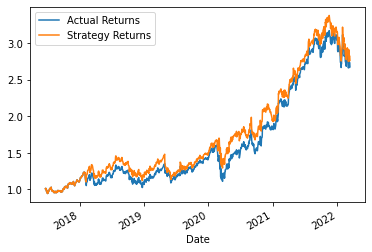

In [417]:
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot()

In [418]:
Bollinger_window = 20
goog_df['SMAB'] = goog_df['Close'].rolling(window=Bollinger_window).mean()
goog_df = goog_df.dropna()
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume,macd,exp3,Actual Returns,Signal,SMAB
Date,,,,,,,,,,,
2017-04-13,822.140015,826.380005,821.440002,823.559998,823.559998,1122400,-4.825748,-4.762498,-0.000922,-1.0,828.925998
2017-04-17,825.010010,837.750000,824.469971,837.169983,837.169983,895000,-3.687209,-4.547440,0.016526,1.0,828.178497
2017-04-18,834.219971,838.929993,832.710022,836.820007,836.820007,836700,-2.781089,-4.194170,-0.000418,-1.0,827.599496
2017-04-19,839.789978,842.219971,836.289978,838.210022,838.210022,954200,-1.928589,-3.741054,0.001661,1.0,827.986997
2017-04-20,841.440002,845.200012,839.320007,841.650024,841.650024,959000,-0.964282,-3.185699,0.004104,1.0,828.589996


In [419]:
goog_df['SD'] = goog_df['Close'].rolling(window=Bollinger_window).std()
goog_df['bollinger_up'] = goog_df['SMAB'] + (goog_df['SD'] * 2)
goog_df['bollinger_down'] = goog_df['SMAB'] - (goog_df['SD'] * 2)
goog_df.dropna(inplace=True)
goog_df.reset_index(inplace=True)
goog_df.set_index('Date', inplace=True)

In [420]:
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume,macd,exp3,Actual Returns,Signal,SMAB,SD,bollinger_up,bollinger_down
Date,,,,,,,,,,,,,,
2017-05-11,925.320007,932.530029,923.030029,930.599976,930.599976,835000,25.300699,21.415151,0.001960,1.0,887.414499,40.775611,968.965721,805.863277
2017-05-12,931.530029,933.440002,927.849976,932.219971,932.219971,1050600,24.920658,22.116253,0.001741,1.0,892.847498,39.021008,970.889513,814.805482
2017-05-15,932.950012,938.250000,929.340027,937.080017,937.080017,1108100,24.726605,22.638323,0.005213,1.0,897.842999,37.897071,973.637141,822.048858
2017-05-16,940.000000,943.109985,937.580017,943.000000,943.000000,969500,24.765034,23.063665,0.006317,1.0,903.151999,36.302248,975.756495,830.547503
2017-05-17,935.669983,939.333008,918.140015,919.619995,919.619995,2362100,22.647848,22.980502,-0.024793,-1.0,907.222497,33.056225,973.334948,841.110047


In [421]:
f1 = goog_df.hvplot.line(x='Date', y=['Close','bollinger_up','bollinger_down'])
f1                       

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [422]:
X = goog_df[['bollinger_up', 'bollinger_down']].shift().dropna()
X.head()

,bollinger_up,bollinger_down
Date,,
2017-05-12,968.965721,805.863277
2017-05-15,970.889513,814.805482
2017-05-16,973.637141,822.048858
2017-05-17,975.756495,830.547503
2017-05-18,973.334948,841.110047


In [423]:
y = goog_df['Signal']
y.value_counts()

 1.0    671
-1.0    549
Name: Signal, dtype: int64

In [424]:
training_begin = X.index.min()
print(training_begin)

2017-05-12 00:00:00


In [425]:
training_end = X.index.min() + DateOffset(months=3)
print(training_end)

2017-08-12 00:00:00


In [426]:
X_train1 = X.loc[training_begin:training_end]
y_train1 = y.loc[training_begin:training_end]
X_train1.head()

,bollinger_up,bollinger_down
Date,,
2017-05-12,968.965721,805.863277
2017-05-15,970.889513,814.805482
2017-05-16,973.637141,822.048858
2017-05-17,975.756495,830.547503
2017-05-18,973.334948,841.110047


In [427]:
X_test1 = X.loc[training_end:]
y_test1 = y.loc[training_end:]
X_test1.head()

,bollinger_up,bollinger_down
Date,,
2017-08-14,983.617421,899.307597
2017-08-15,982.484747,897.365271
2017-08-16,979.251805,896.280207
2017-08-17,974.226342,896.912672
2017-08-18,969.640242,895.781767


In [428]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train1)
X_train1_scaled = X_scaler.transform(X_train1)
X_test1_scaled = X_scaler.transform(X_test1)

In [429]:
svm1_model = svm.SVC()
svm1_model = svm1_model.fit(X_train1_scaled, y_train1)
svm1_pred_training = svm1_model.predict(X_train1_scaled)
svm1_pred_training

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [430]:
svm1_training_report = classification_report(y_train1, svm1_pred_training)
print(svm1_training_report)

              precision    recall  f1-score   support

        -1.0       0.63      0.70      0.67        27
         1.0       0.76      0.70      0.73        37

    accuracy                           0.70        64
   macro avg       0.70      0.70      0.70        64
weighted avg       0.71      0.70      0.70        64



In [431]:
svm1_pred_testing = svm1_model.predict(X_test1_scaled)
svm1_testing_report = classification_report(y_test1, svm1_pred_testing)
print(svm1_testing_report)

              precision    recall  f1-score   support

        -1.0       0.25      0.00      0.01       522
         1.0       0.55      0.99      0.70       633

    accuracy                           0.54      1155
   macro avg       0.40      0.50      0.36      1155
weighted avg       0.41      0.54      0.39      1155



In [432]:
predictions1_df = pd.DataFrame(index = X_test1.index)
predictions1_df['Predicted'] = svm1_pred_testing

In [433]:
predictions1_df['Actual Returns'] = goog_df['Actual Returns']
predictions1_df['Strategy Returns'] = (
    predictions1_df['Actual Returns'] * predictions1_df['Predicted']
)
display(predictions1_df.head())
display(predictions1_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2017-08-14,1.0,0.009055,0.009055
2017-08-15,1.0,-0.000488,-0.000488
2017-08-16,1.0,0.005140,0.005140
2017-08-17,1.0,-0.017239,-0.017239
2017-08-18,1.0,-0.000340,-0.000340


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-03-09,1.0,0.051757,0.051757
2022-03-10,1.0,-0.008845,-0.008845
2022-03-11,1.0,-0.016630,-0.016630
2022-03-14,1.0,-0.028622,-0.028622
2022-03-15,1.0,0.023035,0.023035


<AxesSubplot:xlabel='Date'>

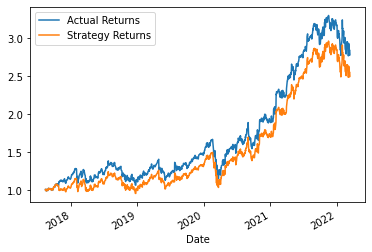

In [434]:
(1 + predictions1_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot()

In [436]:
zillow_df = pd.read_csv(Path("/Users/Hockenbery/fintech/Python_Project/Project-2/z.csv"),
    #index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

In [437]:
zillow_df.head()

,Date,Open,High,Low,Close,Volume
2017-03-16,36.770000,36.970001,36.450001,36.689999,36.689999,739000
2017-03-17,36.650002,36.650002,36.244999,36.360001,36.360001,617100
2017-03-20,36.349998,36.509998,36.080002,36.240002,36.240002,603400
2017-03-21,36.310001,36.480000,35.160000,35.169998,35.169998,1528900
2017-03-22,35.110001,35.639999,35.029999,35.290001,35.290001,1100600


In [441]:
zillow_df.drop(columns=['Close'], inplace=True)

In [442]:
zillow_df.head()

,Date,Open,High,Low,Volume
2017-03-16,36.770000,36.970001,36.450001,36.689999,739000
2017-03-17,36.650002,36.650002,36.244999,36.360001,617100
2017-03-20,36.349998,36.509998,36.080002,36.240002,603400
2017-03-21,36.310001,36.480000,35.160000,35.169998,1528900
2017-03-22,35.110001,35.639999,35.029999,35.290001,1100600


In [452]:
zillow_df.index.name = 'Date'

In [453]:
zillow_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-16,36.770000,36.970001,36.450001,36.689999,739000
2017-03-17,36.650002,36.650002,36.244999,36.360001,617100
2017-03-20,36.349998,36.509998,36.080002,36.240002,603400
2017-03-21,36.310001,36.480000,35.160000,35.169998,1528900
2017-03-22,35.110001,35.639999,35.029999,35.290001,1100600


<AxesSubplot:xlabel='Date'>

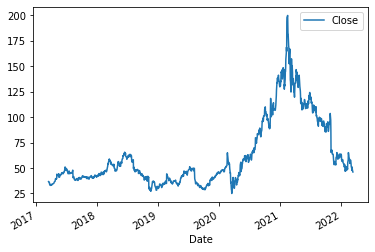

In [454]:
zillow_df.plot(y='Close')

In [455]:
exp1 = zillow_df.Close.ewm(span=12, adjust=False).mean()
exp2 = zillow_df.Close.ewm(span=26, adjust=False).mean()

In [456]:
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
zillow_df['macd'] = macd
zillow_df['exp3'] = exp3
zillow_df.head()

,Open,High,Low,Close,Volume,macd,exp3
Date,,,,,,,
2017-03-16,36.770000,36.970001,36.450001,36.689999,739000,0.000000,0.000000
2017-03-17,36.650002,36.650002,36.244999,36.360001,617100,-0.026325,-0.005265
2017-03-20,36.349998,36.509998,36.080002,36.240002,603400,-0.056222,-0.015456
2017-03-21,36.310001,36.480000,35.160000,35.169998,1528900,-0.164361,-0.045237
2017-03-22,35.110001,35.639999,35.029999,35.290001,1100600,-0.237640,-0.083718


In [457]:
zillow_df.hvplot.line(y=['macd', 'exp3'])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [458]:
zillow_df["Actual Returns"] = zillow_df["Close"].pct_change()

In [459]:
zillow_df['Signal'] = 0.0
zillow_df.loc[(zillow_df['Actual Returns'] >= 0), 'Signal'] = 1
zillow_df.loc[(zillow_df['Actual Returns'] < 0), 'Signal'] = -1
zillow_df = zillow_df.dropna()
display(zillow_df.head())
display(zillow_df.tail())

,Open,High,Low,Close,Volume,macd,exp3,Actual Returns,Signal
Date,,,,,,,,,
2017-03-17,36.650002,36.650002,36.244999,36.360001,617100,-0.026325,-0.005265,-0.008994,-1.0
2017-03-20,36.349998,36.509998,36.080002,36.240002,603400,-0.056222,-0.015456,-0.003300,-1.0
2017-03-21,36.310001,36.480000,35.160000,35.169998,1528900,-0.164361,-0.045237,-0.029525,-1.0
2017-03-22,35.110001,35.639999,35.029999,35.290001,1100600,-0.237640,-0.083718,0.003412,1.0
2017-03-23,35.189999,35.189999,33.430000,33.529999,3454500,-0.432743,-0.153523,-0.049873,-1.0


,Open,High,Low,Close,Volume,macd,exp3,Actual Returns,Signal
Date,,,,,,,,,
2022-03-08,48.150002,50.188000,46.970001,47.650002,5412100,-0.909403,0.179181,-0.038733,-1.0
2022-03-09,48.680000,51.090000,48.320000,51.040001,3540700,-1.058903,-0.068435,0.071144,1.0
2022-03-10,50.169998,50.419998,48.919998,49.860001,2529900,-1.258097,-0.306368,-0.023119,-1.0
2022-03-11,50.299999,50.639999,48.029999,48.099998,2699700,-1.540222,-0.553139,-0.035299,-1.0
2022-03-14,48.000000,48.580002,45.340000,46.130001,3427300,-1.900859,-0.822683,-0.040956,-1.0


In [460]:
X = zillow_df[['macd', 'exp3']].shift().dropna()
X.head()

,macd,exp3
Date,,
2017-03-20,-0.026325,-0.005265
2017-03-21,-0.056222,-0.015456
2017-03-22,-0.164361,-0.045237
2017-03-23,-0.237640,-0.083718
2017-03-24,-0.432743,-0.153523


In [461]:
y = zillow_df['Signal']
y.value_counts()

 1.0    661
-1.0    596
Name: Signal, dtype: int64

In [462]:
training_begin = X.index.min()
print(training_begin)

2017-03-20 00:00:00


In [463]:
training_end = X.index.min() + DateOffset(months=3)
print(training_end)

2017-06-20 00:00:00


In [464]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_train.head()

,macd,exp3
Date,,
2017-03-20,-0.026325,-0.005265
2017-03-21,-0.056222,-0.015456
2017-03-22,-0.164361,-0.045237
2017-03-23,-0.237640,-0.083718
2017-03-24,-0.432743,-0.153523


In [465]:
X_test = X.loc[training_end + DateOffset(hours=1):]
y_test = y.loc[training_end + DateOffset(hours=1):]
X_test.head()

,macd,exp3
Date,,
2017-06-21,1.368575,1.316482
2017-06-22,1.498477,1.352881
2017-06-23,1.645398,1.411384
2017-06-26,1.883750,1.505858
2017-06-27,1.991590,1.603004


In [466]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [467]:
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)
svm_pred_training = svm_model.predict(X_train_scaled)
svm_pred_training

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [468]:
svm_training_report = classification_report(y_train, svm_pred_training)
print(svm_training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        21
         1.0       0.68      1.00      0.81        44

    accuracy                           0.68        65
   macro avg       0.34      0.50      0.40        65
weighted avg       0.46      0.68      0.55        65



/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [469]:
svm_pred_testing = svm_model.predict(X_test_scaled)
svm_testing_report = classification_report(y_test, svm_pred_testing)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       574
         1.0       0.52      1.00      0.68       617

    accuracy                           0.52      1191
   macro avg       0.26      0.50      0.34      1191
weighted avg       0.27      0.52      0.35      1191



/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [470]:
predictions_df = pd.DataFrame(index = X_test.index)
predictions_df['Predicted'] = svm_pred_testing

In [471]:
predictions_df['Actual Returns'] = goog_df['Actual Returns']
predictions_df['Strategy Returns'] = (
    predictions_df['Actual Returns'] * predictions_df['Predicted']
)
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2017-06-21,1.0,0.009278,0.009278
2017-06-22,1.0,-0.002460,-0.002460
2017-06-23,1.0,0.008881,0.008881
2017-06-26,1.0,-0.013795,-0.013795
2017-06-27,1.0,-0.026190,-0.026190


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-03-08,1.0,0.006437,0.006437
2022-03-09,1.0,0.051757,0.051757
2022-03-10,1.0,-0.008845,-0.008845
2022-03-11,1.0,-0.016630,-0.016630
2022-03-14,1.0,-0.028622,-0.028622


In [473]:
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [474]:
Bollinger_window = 20
zillow_df['SMAB'] = zillow_df['Close'].rolling(window=Bollinger_window).mean()
zillow_df = zillow_df.dropna()
zillow_df.head()

/var/folders/b8/s7fb18b52b55x0vh8h1qdpm80000gq/T/ipykernel_45346/2011767230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df['SMAB'] = zillow_df['Close'].rolling(window=Bollinger_window).mean()


,Open,High,Low,Close,Volume,macd,exp3,Actual Returns,Signal,SMAB
Date,,,,,,,,,,
2017-04-13,34.450001,34.900002,34.290001,34.619999,668100,-0.415967,-0.593934,0.004352,1.0,34.2440
2017-04-17,34.590000,35.130001,34.520000,35.119999,625100,-0.319324,-0.539012,0.014443,1.0,34.1820
2017-04-18,35.070000,35.700001,34.869999,35.650002,862900,-0.197688,-0.470747,0.015091,1.0,34.1525
2017-04-19,35.889999,36.169998,35.750000,36.139999,516800,-0.061048,-0.388808,0.013745,1.0,34.2010
2017-04-20,36.000000,36.410000,35.889999,36.330002,856400,0.061858,-0.298674,0.005257,1.0,34.2530


In [475]:
zillow_df['SD'] = zillow_df['Close'].rolling(window=Bollinger_window).std()
zillow_df['bollinger_up'] = zillow_df['SMAB'] + (zillow_df['SD'] * 2)
zillow_df['bollinger_down'] = zillow_df['SMAB'] - (zillow_df['SD'] * 2)
zillow_df.dropna(inplace=True)
zillow_df.reset_index(inplace=True)
zillow_df.set_index('Date', inplace=True)

In [476]:
zillow_df.head()

,Open,High,Low,Close,Volume,macd,exp3,Actual Returns,Signal,SMAB,SD,bollinger_up,bollinger_down
Date,,,,,,,,,,,,,
2017-05-11,42.860001,43.439999,42.630001,43.230000,1031500,2.059478,1.598145,0.003016,1.0,39.0925,2.989226,45.070952,33.114048
2017-05-12,43.080002,43.450001,42.779999,42.869999,1077600,2.043216,1.687160,-0.008328,-1.0,39.5050,2.907677,45.320353,33.689647
2017-05-15,42.919998,43.805000,42.889999,43.290001,992900,2.040695,1.757867,0.009797,1.0,39.9135,2.832124,45.577748,34.249251
2017-05-16,43.240002,44.490002,42.959999,44.389999,1577100,2.103213,1.826936,0.025410,1.0,40.3505,2.813874,45.978248,34.722751
2017-05-17,43.520000,43.790001,41.299999,41.369999,2417400,1.887315,1.839012,-0.068033,-1.0,40.6120,2.639610,45.891220,35.332779


In [477]:
f1 = zillow_df.hvplot.line(x='Date', y=['Close','bollinger_up','bollinger_down'])
f1  

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [478]:
X = zillow_df[['bollinger_up', 'bollinger_down']].shift().dropna()
X.head()

,bollinger_up,bollinger_down
Date,,
2017-05-12,45.070952,33.114048
2017-05-15,45.320353,33.689647
2017-05-16,45.577748,34.249251
2017-05-17,45.978248,34.722751
2017-05-18,45.891220,35.332779


In [479]:
y = zillow_df['Signal']
y.value_counts()

 1.0    637
-1.0    582
Name: Signal, dtype: int64

In [480]:
training_begin = X.index.min()
print(training_begin)

2017-05-12 00:00:00


In [481]:
training_end = X.index.min() + DateOffset(months=3)
print(training_end)

2017-08-12 00:00:00


In [482]:
X_train1 = X.loc[training_begin:training_end]
y_train1 = y.loc[training_begin:training_end]
X_train1.head()

,bollinger_up,bollinger_down
Date,,
2017-05-12,45.070952,33.114048
2017-05-15,45.320353,33.689647
2017-05-16,45.577748,34.249251
2017-05-17,45.978248,34.722751
2017-05-18,45.891220,35.332779


In [483]:
X_test1 = X.loc[training_end:]
y_test1 = y.loc[training_end:]
X_test1.head()

,bollinger_up,bollinger_down
Date,,
2017-08-14,48.685745,41.449255
2017-08-15,48.594370,40.988630
2017-08-16,48.602513,40.413487
2017-08-17,48.677960,39.826040
2017-08-18,48.980671,38.966329


In [484]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train1)
X_train1_scaled = X_scaler.transform(X_train1)
X_test1_scaled = X_scaler.transform(X_test1)

In [485]:
svm1_model = svm.SVC()
svm1_model = svm1_model.fit(X_train1_scaled, y_train1)
svm1_pred_training = svm1_model.predict(X_train1_scaled)
svm1_pred_training

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [486]:
svm1_training_report = classification_report(y_train1, svm1_pred_training)
print(svm1_training_report)

              precision    recall  f1-score   support

        -1.0       0.62      0.55      0.58        29
         1.0       0.66      0.71      0.68        35

    accuracy                           0.64        64
   macro avg       0.64      0.63      0.63        64
weighted avg       0.64      0.64      0.64        64



In [487]:
svm1_pred_testing = svm1_model.predict(X_test1_scaled)
svm1_testing_report = classification_report(y_test1, svm1_pred_testing)
print(svm1_testing_report)

              precision    recall  f1-score   support

        -1.0       0.37      0.05      0.09       553
         1.0       0.51      0.91      0.66       601

    accuracy                           0.50      1154
   macro avg       0.44      0.48      0.38      1154
weighted avg       0.44      0.50      0.39      1154



In [488]:
predictions1_df = pd.DataFrame(index = X_test1.index)
predictions1_df['Predicted'] = svm1_pred_testing

In [489]:
predictions1_df['Actual Returns'] = zillow_df['Actual Returns']
predictions1_df['Strategy Returns'] = (
    predictions1_df['Actual Returns'] * predictions1_df['Predicted']
)
display(predictions1_df.head())
display(predictions1_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2017-08-14,1.0,0.014889,0.014889
2017-08-15,1.0,-0.017557,-0.017557
2017-08-16,1.0,-0.008323,-0.008323
2017-08-17,1.0,-0.037522,-0.037522
2017-08-18,1.0,-0.008977,-0.008977


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-03-08,1.0,-0.038733,-0.038733
2022-03-09,1.0,0.071144,0.071144
2022-03-10,1.0,-0.023119,-0.023119
2022-03-11,1.0,-0.035299,-0.035299
2022-03-14,1.0,-0.040956,-0.040956


<AxesSubplot:xlabel='Date'>

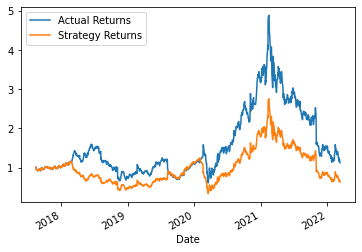

In [490]:
(1 + predictions1_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot()